In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import numpy as np

import matplotlib
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

df_1 = pd.read_csv("../output/task1-1.csv")
df_1_fill = pd.read_csv("../output/task1-1-fill.csv")
df_2 = pd.read_csv("../output/task1-2.csv")
df_2_fill = pd.read_csv("../output/task1-2-fill.csv")

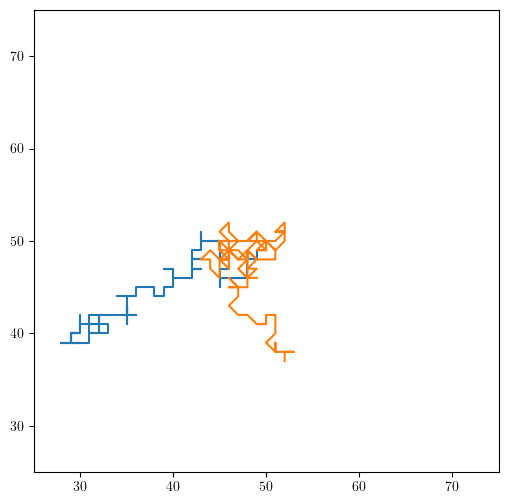

In [76]:
plt.figure(figsize=(6, 6))
plt.plot(df_1['x'], df_1['y'], label='task1-1')
plt.plot(df_2['x'], df_2['y'], label='task1-2')
plt.xlim(25,75)
plt.ylim(25,75)
plt.show()

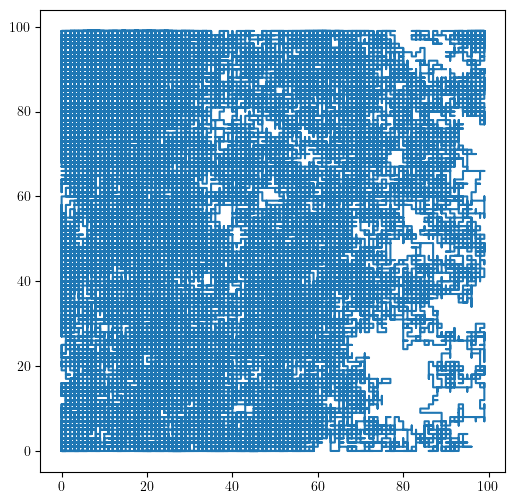

In [77]:
plt.figure(figsize=(6, 6))
plt.plot(df_1_fill['x'], df_1_fill['y'], label='task1-1-fill')
plt.show()

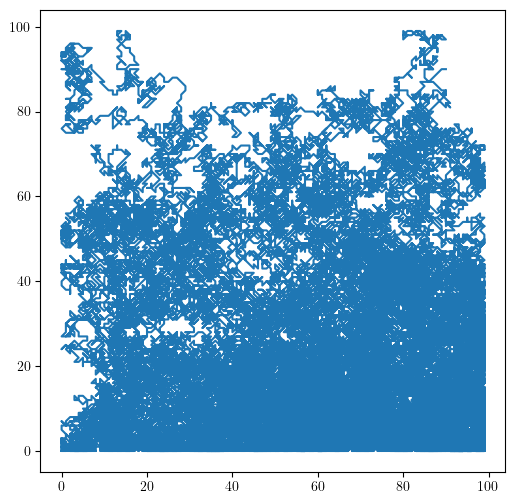

In [78]:
plt.figure(figsize=(6, 6))
plt.plot(df_2_fill['x'], df_2_fill['y'], label='task1-2-fill')
plt.show()

In [79]:
# Load all .csv file
data = {}
for file in os.listdir("../output/bulk"):
    if file.endswith(".csv"):
        name = file.split(".")[0]
        record = {}
        record["df"] = pd.read_csv(f"../output/bulk/{file}")
        record["avg_length"] = record["df"]["length"].mean()

        record["diagonal"] = name[6:7] == "2"
        record["start-x"] = int(name[8:10])
        record["start-y"] = int(name[11:13])
        record["end-x"] = int(name[15:17])
        record["end-y"] = int(name[18:20])
        record["distance"] = ((record["end-x"] - record["start-x"])**2 + (record["end-y"] - record["start-y"])**2)**0.5

        data[name] = record

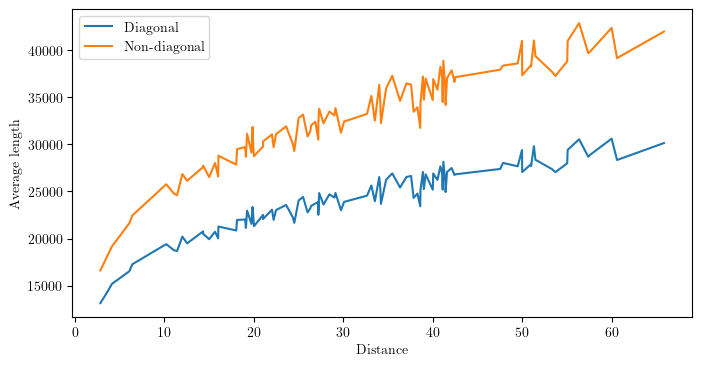

In [80]:
# separate the data into diagonal and non-diagonal
diagonal_data = []
non_diagonal_data = []

for name, info in data.items():
    if info["diagonal"]:
        diagonal_data.append(info)
    else:
        non_diagonal_data.append(info)

# sort the data by distance
diagonal_data.sort(key=lambda x: x["distance"])
non_diagonal_data.sort(key=lambda x: x["distance"])

plt.figure(figsize=(8, 4))
plt.plot([x["distance"] for x in diagonal_data], [x["avg_length"] for x in diagonal_data], label="Diagonal")
plt.plot([x["distance"] for x in non_diagonal_data], [x["avg_length"] for x in non_diagonal_data], label="Non-diagonal")

plt.legend()
plt.xlabel("Distance")
plt.ylabel("Average length")
plt.show()

In [81]:
# select a random data
index = random.choice(range(len(diagonal_data)))
diagonal_selected = diagonal_data[index]
non_diagonal_selected = non_diagonal_data[index]

32789.80606


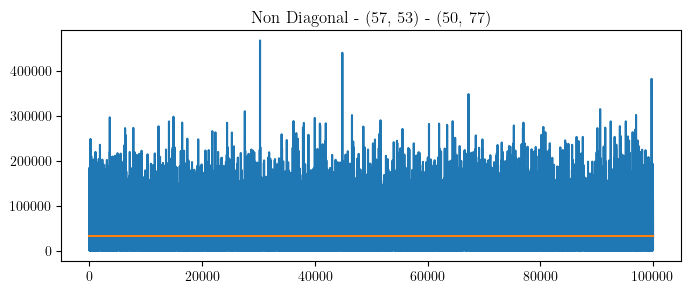

In [82]:
# calculate the average length of the path
avg_length_1a = non_diagonal_selected["df"]['length'].mean()
print(avg_length_1a)
plt.figure(figsize=(8, 3))
plt.plot(non_diagonal_selected["df"]['length'])
plt.plot([0, non_diagonal_selected["df"]['length'].count()], [avg_length_1a, avg_length_1a], label='average path length')
plt.title(f"Non Diagonal - ({non_diagonal_selected['start-x']}, {non_diagonal_selected['start-y']}) - ({non_diagonal_selected['end-x']}, {non_diagonal_selected['end-y']})")
plt.show()

24047.4465


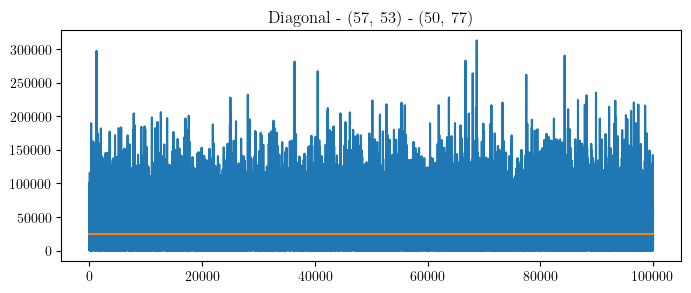

In [83]:
# calculate the average length of the path
avg_length_2a = diagonal_selected["df"]['length'].mean()
print(avg_length_2a)
plt.figure(figsize=(8, 3))
plt.plot(diagonal_selected["df"]['length'])
plt.plot([0, diagonal_selected["df"]['length'].count()], [avg_length_2a, avg_length_2a], label='average path length')
plt.title(f"Diagonal - ({diagonal_selected['start-x']}, {diagonal_selected['start-y']}) - ({diagonal_selected['end-x']}, {diagonal_selected['end-y']})")
plt.show()

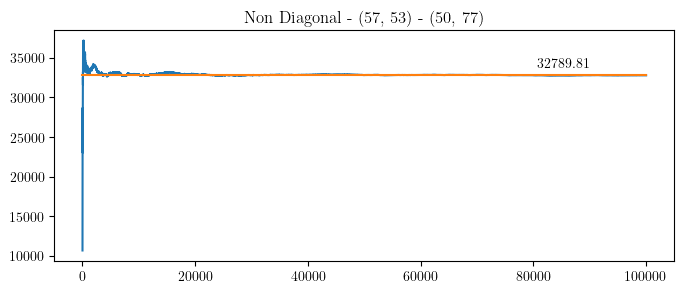

In [84]:
# calculate the mean at each step
rolling_length_1a = []
for i in range(1, non_diagonal_selected["df"]['length'].count()):
    rolling_length_1a.append(non_diagonal_selected["df"][:i]['length'].mean())
plt.figure(figsize=(8, 3))
plt.plot(rolling_length_1a)
plt.plot([0, non_diagonal_selected["df"]['length'].count()], [avg_length_1a, avg_length_1a], label='average path length')
plt.text(non_diagonal_selected["df"]['length'].count() - 10000, avg_length_1a + 1000, f'{avg_length_1a:.2f}', ha='right')
plt.title(f"Non Diagonal - ({non_diagonal_selected['start-x']}, {non_diagonal_selected['start-y']}) - ({non_diagonal_selected['end-x']}, {non_diagonal_selected['end-y']})")
plt.show()

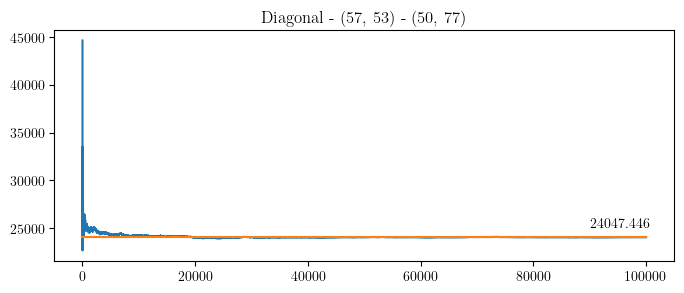

In [85]:
# calculate the mean at each step
rolling_length_2a = []
for i in range(1, diagonal_selected["df"]['length'].count()):
    rolling_length_2a.append(diagonal_selected["df"][:i]['length'].mean())
plt.figure(figsize=(8, 3))
plt.plot(rolling_length_2a)
plt.plot([0, diagonal_selected["df"]['length'].count()], [avg_length_2a, avg_length_2a], label='average path length')
plt.text(diagonal_selected["df"]['length'].count() - 10000, avg_length_2a + 1000, "{:.3f}".format(avg_length_2a))
plt.title(f"Diagonal - ({diagonal_selected['start-x']}, {diagonal_selected['start-y']}) - ({diagonal_selected['end-x']}, {diagonal_selected['end-y']})")
plt.show()

In [86]:
# open visited data
visited = pd.read_csv("../output/task1-visited.csv")
visited_np = visited.pivot(index='y', columns='x', values='count').to_numpy()
visited_diagonal = pd.read_csv("../output/task1-visited-diagonal.csv")
visited_diagonal_np = visited_diagonal.pivot(index='y', columns='x', values='count').to_numpy()

# get the minimum and maximum value for color normalization, which is the minimum and maximum value of the visited count
min_val = min(visited['count'].min(), visited_diagonal['count'].min())
max_val = max(visited['count'].max(), visited_diagonal['count'].max())

print(min_val, max_val)

881117 3379291


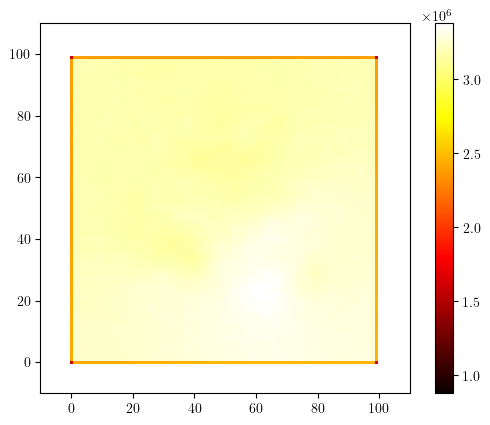

In [87]:
# plot the visited data
plt.imshow(visited_np, cmap='hot')
plt.xlim(-10, 110)
plt.ylim(-10, 110)
plt.clim(min_val, max_val)
plt.colorbar()
plt.show()

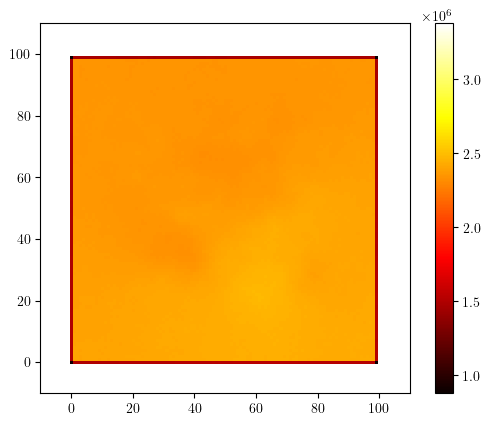

In [88]:
# plot the visited data
visited_diagonal_np = visited_diagonal.pivot(index='y', columns='x', values='count').to_numpy()
plt.imshow(visited_diagonal_np, cmap='hot')
plt.xlim(-10, 110)
plt.ylim(-10, 110)
plt.clim(min_val, max_val)
plt.colorbar()
plt.show()

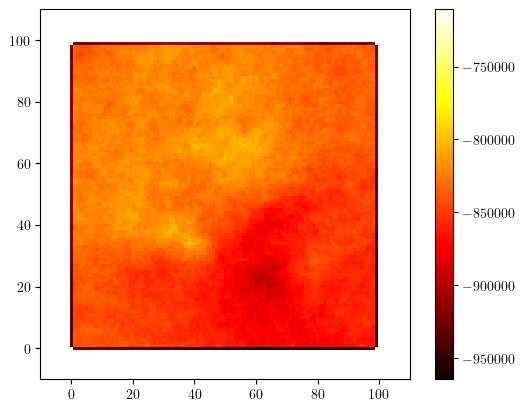

In [89]:
# do the difference between the two visited data
visited_diff_np = visited_diagonal_np - visited_np
plt.imshow(visited_diff_np, cmap='hot', interpolation='nearest')
plt.xlim(-10, 110)
plt.ylim(-10, 110)
plt.colorbar()
plt.show()